<a href="https://colab.research.google.com/github/asmundur/Projects/blob/master/coco_text_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Demo for the COCO-Text data API 

In this demo, we will learn how to load the COCO-Text data using the python API.

Let's first import the `coco_text` tool API package. 

In [3]:
from google.colab import auth
from googleapiclient.http import MediaIoBaseDownload
from googleapiclient.discovery import build
auth.authenticate_user()
drive_service = build('drive', 'v3')
import os, io

to_download = ['coco-text-master.zip',
               'cocotext.v2.zip',
               'convert_to_pascalformat.py',
               'faster_rcnn_inception_v2_coco.config',
               'text_label_map.pbtxt']
for item in to_download:
    filename = item
    results = drive_service.files().list(q="name = '{}'".format(filename), fields="files(id)").execute()
    print(filename)
    print(results)
    file_id = (results.get('files', [])[0]).get('id')
    print(file_id)

    request = drive_service.files().get_media(fileId=file_id)
    fh = io.FileIO(filename, 'wb')
    downloader = MediaIoBaseDownload(fh, request)
    done = False
    while done is False:
        status, done = downloader.next_chunk()
        print("Download %d%%." % int(status.progress() * 100)) 
    # !tar -zxvf ssd_mobilenet_v2_coco_2018_03_29.tar.gz

!unzip -qq -o coco-text-master.zip
!unzip -qq -o cocotext.v2.zip


coco-text-master.zip
{'files': [{'id': '1J0jEVdhnlKBdl8AbvCpwOPcwy_X65Lfe'}]}
1J0jEVdhnlKBdl8AbvCpwOPcwy_X65Lfe
Download 100%.
cocotext.v2.zip
{'files': [{'id': '1zBFUxN38Y2rRb3svpUb5dxmzmlhz9v-v'}]}
1zBFUxN38Y2rRb3svpUb5dxmzmlhz9v-v
Download 100%.
convert_to_pascalformat.py
{'files': [{'id': '11cRiqJK-qZCnX_RIaVnMoPVnHtYxjC8e'}]}
11cRiqJK-qZCnX_RIaVnMoPVnHtYxjC8e
Download 100%.
faster_rcnn_inception_v2_coco.config
{'files': [{'id': '143V5IeR3cvkyJGnVf_m2YqnW8QSX_E2T'}]}
143V5IeR3cvkyJGnVf_m2YqnW8QSX_E2T
Download 100%.
text_label_map.pbtxt
{'files': [{'id': '1Y2hIKitRX8hOgf7h9QaexaaOYvS8AgcC'}]}
1Y2hIKitRX8hOgf7h9QaexaaOYvS8AgcC
Download 100%.


In [0]:
!mv coco-text-master/* .
# !mv COCO_Text/* .

import coco_text

Make sure that you have downloaded the annotation file from the website.

Once downloaded, you can import the annotations in the following way:

In [5]:
ct = coco_text.COCO_Text('cocotext.v2.json')

loading annotations into memory...
0:00:02.011740
creating index...
index created!


Now, lets use the API. First, the API offers some basic infos of the dataset.

In [0]:
ct.info()

### Select annotations and images based on filter criteria

Let's retrieve some images. We want to get a list of all image ids from the training set, where the image contains at least one text instance that is legilbe and is machine printed.

In [0]:
imgs = ct.getImgIds(imgIds=ct.train, 
                    catIds=[('legibility','legible'),('class','machine printed')])

In [8]:
len(imgs)

13880

Let's now go on to the annotations. We want to get a list of all annotation ids from the validation set that are legible, machine printed and have an area between 0 and 200 pixels.

In [0]:
anns = ct.getAnnIds(imgIds=ct.train, 
                        catIds=[('legibility','legible'),('class','machine printed')], 
                        areaRng=[0,200])

# 2 Visualize COCOText Annotations

In order to visualize the COCO Text annotations, please make sure to download the COCO Images from the MSCOCO website: http://mscoco.org/dataset/#download 

In [0]:
# !pip install wget
# import wget
url = "http://images.cocodataset.org/zips/train2014.zip"
if not os.path.exists('./train2014.zip'):
    !wget $url
    !unzip -qq train2014.zip 2>/dev/null

In [0]:
# url = 'http://images.cocodataset.org/zips/val2017.zip'
# wget.download(url, '.')
# url = 'http://images.cocodataset.org/zips/test2017.zip'
# wget.download(url, '.')
# !rm -r train2014.zip; mv train2014.zip.1 train2014.zip
# !rm -r val2014.zip; mv val2014.zip.1 val2014.zip

# !unzip -qq val2017.zip 2>/dev/null
# !unzip -qq test2017.zip 2>/dev/null

After downloading the images, specify the path to the MSCOCO image data.

In [0]:
url = 'http://images.cocodataset.org/zips/val2014.zip'
# if not os.path.exists('./val2014.zip'):
#     !wget $url
#     !unzip -qq val2014.zip 2>/dev/null


In [0]:
url = 'http://images.cocodataset.org/zips/test2014.zip'
# if not os.path.exists('./test2014.zip'):
#     !wget $url
#     !unzip -qq test2014.zip 2>/dev/null




# for i in ['train2014.zip', 'val2014.zip', 'test2014.zip']:
#     !rm $i

In [0]:
dataDir='.'
dataType='train2014'

Lets now import some useful tools to visualize the COCO images and annotations

In [0]:
%matplotlib inline
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

Using the API introduced above, lets select an image that has at least one instance of legible text.

In [0]:
# get all images containing at least one instance of legible text
imgIds = ct.getImgIds(imgIds=ct.train, 
                    catIds=[('legibility','legible')])
# pick one at random
img = ct.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

We can now load the image

train2014/COCO_train2014_000000391914.jpg
train2014/COCO_train2014_000000391914.jpg


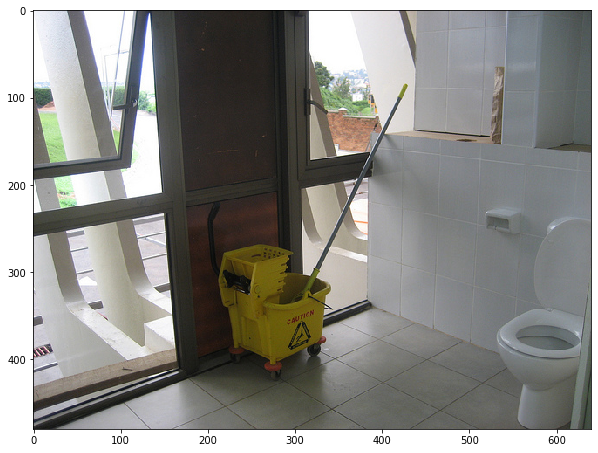

In [17]:
img_file = img['file_name']

img_name = '{}/{}'.format(dataType,img_file)
print(img_name)
I = io.imread(img_name)
print('{}/{}'.format(dataType,img['file_name']))
plt.figure()
plt.imshow(I)

Lastly, we can load and display the text annotations

[{'mask': [322.4, 343.3, 290.9, 355.4, 292.3, 360.8, 322.7, 348.6], 'class': 'machine printed', 'bbox': [290.9, 343.3, 31.8, 17.5], 'image_id': 391914, 'id': 117966, 'language': 'english', 'area': 175.91, 'utf8_string': 'CAUTION', 'legibility': 'legible'}]


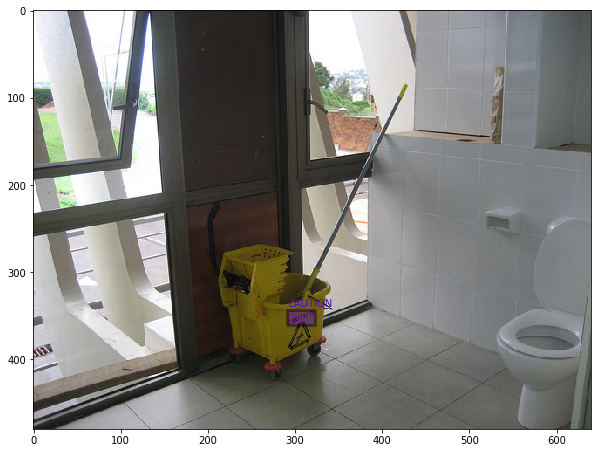

In [18]:
# load and display text annotations
plt.imshow(I)
annIds = ct.getAnnIds(imgIds=img['id'])
anns = ct.loadAnns(annIds)
print(anns)
ct.showAnns(anns)

# 3 Demo for the COCO-Text evaluation API

In this demo we will learn how to use the COCO-Text evaluation API to evaluate text detection and recognition results.

First, let's import the `coco_text_evaluation` API.  

In [0]:
import coco_evaluation

Next, we have to load our recognition results. For this we can use the `loadRes()` function from the `coco_text` tool.

The results have to be saved in the format explained on the website. The '`our_results.json`' file gives an example. Generally, the detections are saved in a json file and form a list of dictionaries like the following:

    [{"image_id": int,
      "bbox": [left, top, width, height],
      "utf8_string": string"},
      {}...]

Then, we can load the results like this:

In [20]:
our_results = ct.loadRes('our_results.json')

Loading and preparing results...     
Results do not correspond to current coco set
skipping  1  images
DONE (t=0.05s)


If the results file contains annotations for images not in the current version of COCO-Text, the loader will notify
that some images are skipped and then ignore the respective annotations. This happens for example, if results for the test set are included in the same file.

### Detection results

Once the resutls are loaded, the evalution tool allows to compute the successful detections with the '`getDetections()`' function. The `detection_threshold` parameter defines how closely the bounding boxes need to overlap. The default value is an Intersection over Union (IoU) score of 0.5. 

In [0]:
our_detections = coco_evaluation.getDetections(ct, our_results, detection_threshold = 0.5)

The detection results comprise three lists: True Positives, False Positives and False Negatives.

In [22]:
print('True positives have a ground truth id and an evaluation id: ', our_detections['true_positives'][0])
print('False positives only have an evaluation id: ', our_detections['false_positives'][0])
print('True negatives only have a ground truth id: ', our_detections['false_negatives'][0])

True positives have a ground truth id and an evaluation id:  {'gt_id': 158802, 'eval_id': 0}
False positives only have an evaluation id:  {'eval_id': 7}
True negatives only have a ground truth id:  {'gt_id': 40555}


### End-to-end results

Let's look into the transcription performance now. For that we ue the '`evaluateTranscription()`' function. And provide our results and detections.

In [0]:
our_endToEnd_results = coco_evaluation.evaluateEndToEnd(ct, our_results, detection_threshold = 0.5)

Now we are ready to see the results. For that we can use the '`printDetailedResults()`' function. The last line can be used to create a table as shown in the paper.

In [24]:
coco_evaluation.printDetailedResults(ct,our_detections,our_endToEnd_results,'our approach')

our approach

Detection
Recall
legible & machine printed:  0.01
legible & handwritten:  0
legible overall:  0.01
illegible & machine printed:  0.00
illegible & handwritten:  0
illegible overall:  0.00
total recall:  0.0
Precision
total precision:  50.00
f-score
f-score localization:  0.01

Transcription
accuracy for exact matches:  0.00
accuracy for matches with edit distance<=1:  100.00

End-to-end
recall:  0.00 precision:  0.00
End-to-end f-score:  0

0.01 & 0 & 0.00 & 0 & 0.0 & 50.00 & 0.01 & 0.00 & 0.00 & 0.00 & 0


In [0]:
# !wget https://github.com/tylin/coco-dpm/blob/master/coco/convert_to_pascalformat.py

In [26]:
print(img)

{'id': 391914, 'set': 'train', 'width': 640, 'file_name': 'COCO_train2014_000000391914.jpg', 'height': 480}


In [27]:
!echo $img

{id: 391914, set: train, width: 640, file_name: COCO_train2014_000000391914.jpg, height: 480}


In [28]:
# !python convert_to_pascalformat.py . train2014

len(ct.val)

10000

In [0]:
imgs = ct.getImgIds(imgIds=ct.train, 
                    catIds=[('legibility','legible'),('class','machine printed')])

In [0]:
def convert_to_pascal_format(dataType):
    # if len(sys.argv) != 3:
    # 	print('usage: python convert_to_pascalformat.py coco_dataDir coco_dataType')
    # 	print('for example: python convert_to_pascalformat.py \'./\' \'val2014\'')
    # 	sys.exit(1)

    dataDir = '.'

    # from pycocotools.coco import COCO
    import os
    annFile='{}/cocotext.v2.json'.format(dataDir)
    catIds=[('legibility','legible'),('class','machine printed')]
    # catIds = [('legibility','legible'),('class','machine printed')]
    # print('hm')
    coco = coco_text.COCO_Text('cocotext.v2.json')

    # cats = coco.loadCats(catIds)

    # nms=[cat['name'] for cat in cats]
    if dataType == 'train':
        imgIds=ct.train
    else : 
        imgIds=ct.val
    
    new_dir = dataType
    !mkdir $new_dir

    directory = '{}/annotations_pascalformat/'.format(new_dir)
    if not os.path.exists(directory):
        os.makedirs(directory)

    for n in range(len(imgIds)):
        img = coco.loadImgs(imgIds[n])[0]
        annIds = coco.getAnnIds(imgIds=img['id'])
        anns = coco.loadAnns(annIds)

        xml = '<annotation>\n<folder>\nCOCO2014pascalformat\n</folder>\n<filename>\n'
        xml += img['file_name'] + '\n</filename>\n<source>\n<database>\nCOCO2014pascalformat\n</database>\n</source>\n<size>\n'
        xml += '<width>\n' + str(img['width']) + '\n</width>\n' + '<height>\n' + str(img['height']) + '\n</height>\n'
        xml += '</size>\n<depth>\n3\n</depth>\n'

        for i in range(len(anns)):
            bbox = anns[i]['bbox']
            # xml += '<object>\n<name>\n' + str(anns[i]['category_id']) + '\n</name>\n'
            xml += '<object>\n<pose>Unspecified</pose>\n<name>\n' + 'machine legible' + '\n</name>\n'
            xml += '<truncated>\n0\n</truncated>\n<difficult>\n0\n</difficult>\n'
            xml += '<bndbox>\n<xmin>\n' + str(int(round(bbox[0]))) + '\n</xmin>\n'
            xml += '<ymin>\n' + str(int(round(bbox[1]))) + '\n</ymin>\n'
            xml += '<xmax>\n' + str(int(round(bbox[0] + bbox[2]))) + '\n</xmax>\n'
            xml += '<ymax>\n' + str(int(round(bbox[1] + bbox[3]))) + '\n</ymax>\n</bndbox>\n'
            xml += '<transcription>'+ anns[i]['utf8_string'] +'</transcription>\n</object>\n'
        xml += '</annotation>'
        if len(anns) > 0:
            f_name = img['file_name']
            # !cp ./$dataType/$f_name ./$new_dir/$f_name 
            f_xml = open(directory + img['file_name'].split('.jpg')[0] + '.xml', 'w')
            f_xml.write(xml)
            f_xml.close()
        if n % 1 == 1000:
            print(str(n) + ' out of ' + str(len(imgIds)))

In [0]:
# !rm -r annotations_pascalformat #train2014
#!unzip -qq train2014.zip 2>/dev/null

# !rm -r train val

In [32]:

convert_to_pascal_format('train')
convert_to_pascal_format('val')

loading annotations into memory...
0:00:01.888025
creating index...
index created!
mkdir: cannot create directory ‘train’: File exists
loading annotations into memory...
0:00:02.153501
creating index...
index created!
mkdir: cannot create directory ‘val’: File exists


In [33]:
#000000273371

!cat annotations_pascalformat/COCO_train2014_000000383893.xml

cat: annotations_pascalformat/COCO_train2014_000000383893.xml: No such file or directory


In [34]:
!rm -r models
!git clone https://github.com/tensorflow/models.git



Cloning into 'models'...
remote: Enumerating objects: 1080, done.
remote: Counting objects: 100% (1080/1080), done.
remote: Compressing objects: 100% (679/679), done.
remote: Total 33138 (delta 615), reused 684 (delta 400), pack-reused 32058
Receiving objects: 100% (33138/33138), 512.34 MiB | 31.43 MiB/s, done.
Resolving deltas: 100% (20925/20925), done.
Checking out files: 100% (3188/3188), done.


In [35]:
%set_env PYTHONPATH=/content/models/research:/content/models/research/slim
!rm -r cocoapi
!git clone https://github.com/cocodataset/cocoapi.git
!cd cocoapi/PythonAPI; make; cp -r pycocotools /content/models/research/

env: PYTHONPATH=/content/models/research:/content/models/research/slim
Cloning into 'cocoapi'...
remote: Enumerating objects: 959, done.
remote: Total 959 (delta 0), reused 0 (delta 0), pack-reused 959
Receiving objects: 100% (959/959), 11.69 MiB | 12.32 MiB/s, done.
Resolving deltas: 100% (570/570), done.
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-

In [36]:
# !wget -O protobuf.zip https://github.com/google/protobuf/releases/download/v3.0.0/protoc-3.0.0-linux-x86_64.zip
# !unzip protobuf.zip
# !cp -r models/research/object_detection ./object_detection


!cd models/research; pwd; protoc object_detection/protos/*.proto --python_out=.; python object_detection/builders/model_builder_test.py




/content/models/research
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTest.test_create_experimental_model
[       OK ] ModelBuilderTest.test_create_experimental_model
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[       OK ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[       OK ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models

In [37]:
!wget http://storage.googleapis.com/download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
!tar -xvf faster_rcnn_inception_v2_coco_2018_01_28.tar.gz

--2019-12-07 02:35:53--  http://storage.googleapis.com/download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.15.128, 2a00:1450:400c:c0a::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.15.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149119618 (142M) [application/x-tar]
Saving to: ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz.3’

faster_rcnn_incepti 100%[===================>] 142.21M  70.8MB/s    in 2.0s    

2019-12-07 02:35:55 (70.8 MB/s) - ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz.3’ saved [149119618/149119618]

faster_rcnn_inception_v2_coco_2018_01_28/
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.index
faster_rcnn_inception_v2_coco_2018_01_28/checkpoint
faster_rcnn_inception_v2_coco_2018_01_28/pipeline.config
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_inception

In [0]:
# !wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
# !tar -xvf VOCtrainval_11-May-2012.tar



In [38]:
!rm -r VOCdevkit/
# !rm -r models/research/object_detection/data/data_images/train2014
# !rm -r models/research/object_detection/data/data_images/annotations_pascalformat

rm: cannot remove 'VOCdevkit/': No such file or directory


In [0]:

!cp faster_rcnn_inception_v2_coco.config  models/research/object_detection/models/faster_rcnn_inception_v2_coco.config
!mv text_label_map.pbtxt models/research/object_detection/data/text_label_map.pbtxt
# !mkdir models/research/object_detection/data/data_images;
# !cp -r train2014 models/research/images
# !cp -r annotations_pascalformat/ models/research/annotations


In [0]:
# !mkdir DATA
# !mkdir DATA/train2014
# !cp -r train2014 DATA/train2014/JPEGImages
# !cp -r annotations_pascalformat/ DATA/train2014/Annotations

In [0]:
# !cd models/research; python object_detection/dataset_tools/create_pascal_tf_record.py \
#     --label_map_path=object_detection/data/text_label_map.pbtxt \
#     --data_dir=`pwd` \
#     --output_dir=`pwd`
# !pwd
# !mkdir models/research/data; cp models/research/object_detection/data/pascal_label_map.pbtxt models/research/data/pascal_label_map.pbtxt
# !mv models/research/object_detection/data/text_label_map.pbtxt models/research/object_detection/data/pascal_label_map.pbtxt
# !cd models/research; ls; pwd; python object_detection/dataset_tools/create_pascal_tf_record.py --data_dir=./DATA --year=merged --output_path=test-out.record
 
# !python models/research/object_detection/dataset_tools/create_coco_tf_record.py --logtostderr --train_image_dir="train2014" --train_annotations_file="cocotext.v2.json" --val_image_dir="val2014" --val_annotations_file="cocotext.v2.json" --test_image_dir="val2014" --testdev_annotations_file="cocotext.v2.json" --output_dir="output"


In [41]:




!cd models/research; chmod a-x train_text.sh; ./train_text.sh

chmod: cannot access 'train_text.sh': No such file or directory
/bin/bash: ./train_text.sh: No such file or directory


In [42]:
#https://medium.com/@moshe.livne/training-tensorflow-for-free-pet-object-detection-api-sample-trained-on-google-collab-c2e65f4a9949
#https://medium.com/p/bfa936d3d103/responses/show


!ls val/annot

ls: cannot access 'val/annot': No such file or directory


In [43]:
# def pascal_to_tf_record()
    # Copyright 2017 The TensorFlow Authors. All Rights Reserved.
    #
    # Licensed under the Apache License, Version 2.0 (the "License");
    # you may not use this file except in compliance with the License.
    # You may obtain a copy of the License at
    #
    #     http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing, software
    # distributed under the License is distributed on an "AS IS" BASIS,
    # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    # See the License for the specific language governing permissions and
    # limitations under the License.
    # ==============================================================================

# r"""Convert raw PASCAL dataset to TFRecord for object_detection.
# Example usage:
#     python object_detection/dataset_tools/create_pascal_tf_record.py \
#         --data_dir=/home/user/VOCdevkit \
#         --year=VOC2012 \
#         --output_path=/home/user/pascal.record
# """
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import hashlib
import io
import logging
import os,sys

from lxml import etree
import PIL.Image
import tensorflow as tf
sys.path.append('models/research/object_detection/utils') #object_detection/app/folder
sys.path.append('models/research/object_detection/')
sys.path.append('models/research')
# from object_detection.utils import dataset_util
# from object_detection.utils import label_map_util
import dataset_util
import label_map_util




def dict_to_tf_example(data,
                        dataset_directory,
                        label_map_dict,
                        ignore_difficult_instances=False,
                        image_subdirectory='JPEGImages'):
    """Convert XML derived dict to tf.Example proto.
    Notice that this function normalizes the bounding box coordinates provided
    by the raw data.
    Args:
        data: dict holding PASCAL XML fields for a single image (obtained by
        running dataset_util.recursive_parse_xml_to_dict)
        dataset_directory: Path to root directory holding PASCAL dataset
        label_map_dict: A map from string label names to integers ids.
        ignore_difficult_instances: Whether to skip difficult instances in the
        dataset  (default: False).
        image_subdirectory: String specifying subdirectory within the
        PASCAL dataset directory holding the actual image data.
    Returns:
        example: The converted tf.Example.
    Raises:
        ValueError: if the image pointed to by data['filename'] is not a valid JPEG
    """
    img_path = os.path.join(data['folder'], image_subdirectory, data['filename'])
    full_path = os.path.join(dataset_directory, img_path)
    with tf.gfile.GFile(full_path, 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = PIL.Image.open(encoded_jpg_io)
    if image.format != 'JPEG':
        raise ValueError('Image format not JPEG')
    key = hashlib.sha256(encoded_jpg).hexdigest()

    width = int(data['size']['width'])
    height = int(data['size']['height'])

    xmin = []
    ymin = []
    xmax = []
    ymax = []
    classes = []
    classes_text = []
    truncated = []
    poses = []
    difficult_obj = []
    if 'object' in data:
        for obj in data['object']:
            difficult = bool(int(obj['difficult']))
            if ignore_difficult_instances and difficult:
                continue

            difficult_obj.append(int(difficult))

            xmin.append(float(obj['bndbox']['xmin']) / width)
            ymin.append(float(obj['bndbox']['ymin']) / height)
            xmax.append(float(obj['bndbox']['xmax']) / width)
            ymax.append(float(obj['bndbox']['ymax']) / height)
            classes_text.append(obj['name'].encode('utf8'))
            classes.append(label_map_dict[obj['name']])
            truncated.append(int(obj['truncated']))
            poses.append(obj['pose'].encode('utf8'))

    example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(
            data['filename'].encode('utf8')),
        'image/source_id': dataset_util.bytes_feature(
            data['filename'].encode('utf8')),
        'image/key/sha256': dataset_util.bytes_feature(key.encode('utf8')),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature('jpeg'.encode('utf8')),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmin),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmax),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymin),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymax),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
        'image/object/difficult': dataset_util.int64_list_feature(difficult_obj),
        'image/object/truncated': dataset_util.int64_list_feature(truncated),
        'image/object/view': dataset_util.bytes_list_feature(poses),
    }))
    return example
# r"""Convert raw PASCAL dataset to TFRecord for object_detection.
# Example usage:
#     python object_detection/dataset_tools/create_pascal_tf_record.py \
#         --data_dir=/home/user/VOCdevkit \
#         --year=VOC2012 \
#         --output_path=/home/user/pascal.record
# """
# flags = tf.app.flags
# flags.DEFINE_string('data_dir', '', 'Root directory to raw PASCAL VOC dataset.')
# flags.DEFINE_string('set', 'train', 'Convert training set, validation set or '
#                     'merged set.')
# flags.DEFINE_string('annotations_dir', 'Annotations',
#                     '(Relative) path to annotations directory.')
# flags.DEFINE_string('year', 'VOC2007', 'Desired challenge year.')
# flags.DEFINE_string('output_path', '', 'Path to output TFRecord')
# flags.DEFINE_string('label_map_path', 'data/pascal_label_map.pbtxt',
#                     'Path to label map proto')
# flags.DEFINE_boolean('ignore_difficult_instances', False, 'Whether to ignore '
#                     'difficult instances')
# FLAGS = flags.FLAGS

SETS = ['train', 'val', 'trainval', 'test']
YEARS = ['VOC2007', 'VOC2012', 'merged']



def create_pascal_tf_record(data_set, data_dir, output_path, label_map_path, year = 'VOC2007'):
    if data_set not in SETS:
        raise ValueError('set must be in : {}'.format(SETS))
    if year not in YEARS:
        raise ValueError('year must be in : {}'.format(YEARS))

    # data_dir = FLAGS.data_dir
    years = ['VOC2007', 'VOC2012']
    if year != 'merged':
        years = [year]

    writer = tf.python_io.TFRecordWriter(output_path)

    label_map_dict = label_map_util.get_label_map_dict(label_map_path)

    for year in years:
        logging.info('Reading from PASCAL %s dataset.', year)
        examples_path = os.path.join(data_dir, year, 'ImageSets', 'Main',
                                    'aeroplane_' + FLAGS.set + '.txt')
        annotations_dir = os.path.join(data_dir, year, FLAGS.annotations_dir)
        examples_list = dataset_util.read_examples_list(examples_path)
        for idx, example in enumerate(examples_list):
            if idx % 100 == 0:
                logging.info('On image %d of %d', idx, len(examples_list))
        path = os.path.join(annotations_dir, example + '.xml')
        with tf.gfile.GFile(path, 'r') as fid:
            xml_str = fid.read()
        xml = etree.fromstring(xml_str)
        data = dataset_util.recursive_parse_xml_to_dict(xml)['annotation']

        tf_example = dict_to_tf_example(data, FLAGS.data_dir, label_map_dict,
                                        FLAGS.ignore_difficult_instances)
        writer.write(tf_example.SerializeToString())

    writer.close()


    # if __name__ == '__main__':
    #     tf.app.run()

In [0]:
# !rm -r out; touch out
# create_pascal_tf_record('train', 'train2014', 'out', 'models/research/object_detection/models/faster_rcnn_inception_v2_coco.config')

In [45]:
to_download = ['xml_to_csv.py',
               'generate_tfrecord.py']
for item in to_download:
    filename = item
    results = drive_service.files().list(q="name = '{}'".format(filename), fields="files(id)").execute()
    print(filename)
    print(results)
    file_id = (results.get('files', [])[0]).get('id')
    print(file_id)

    request = drive_service.files().get_media(fileId=file_id)
    fh = io.FileIO(filename, 'wb')
    downloader = MediaIoBaseDownload(fh, request)
    done = False
    while done is False:
        status, done = downloader.next_chunk()
        print("Download %d%%." % int(status.progress() * 100)) 
    # !tar -zxvf ssd_mobilenet_v2_coco_2018_03_29.tar.gz

xml_to_csv.py
{'files': [{'id': '1lO5jnVCKsDYFwUGj2_0RiBtiYiT_KnAB'}]}
1lO5jnVCKsDYFwUGj2_0RiBtiYiT_KnAB
Download 100%.
generate_tfrecord.py
{'files': [{'id': '1xRqW9AjCfedBSXiOYh6eZ6i90Ne-bsVY'}]}
1xRqW9AjCfedBSXiOYh6eZ6i90Ne-bsVY
Download 100%.


In [46]:
# Run from the xml folder:

# see all files with &
# !cd annotations_pascalformat; grep -R --include="*.xml" "&" .

# replace & in train
!cd train/annotations_pascalformat; perl -pi -e 's/&amp;/&/g' *.xml
!cd train/annotations_pascalformat; grep -R --include="*.xml" "&" .
!cd train/annotations_pascalformat; perl -pi -e 's/&/&amp;/g' *.xml
!cd train/annotations_pascalformat; grep -R --include="*.xml" "&" .


# replace & in val
!cd val/annotations_pascalformat; perl -pi -e 's/&amp;/&/g' *.xml
!cd val/annotations_pascalformat; grep -R --include="*.xml" "&" .
!cd val/annotations_pascalformat; perl -pi -e 's/&/&amp;/g' *.xml
!cd val/annotations_pascalformat; grep -R --include="*.xml" "&" .

./COCO_train2014_000000297417.xml:<transcription>&</transcription>
./COCO_train2014_000000467091.xml:<transcription>by Christopher Chau &#169; 2013</transcription>
./COCO_train2014_000000420823.xml:<transcription>s&#237;mb&#237;ose</transcription>
./COCO_train2014_000000266597.xml:<transcription>B&gt;C002</transcription>
./COCO_train2014_000000471822.xml:<transcription>&#163;6.50</transcription>
./COCO_train2014_000000246848.xml:<transcription>&</transcription>
./COCO_train2014_000000240439.xml:<transcription>&</transcription>
./COCO_train2014_000000357644.xml:<transcription>&</transcription>
./COCO_train2014_000000572207.xml:<transcription>&</transcription>
./COCO_train2014_000000211983.xml:<transcription>&</transcription>
./COCO_train2014_000000422133.xml:<transcription>&#176;F</transcription>
./COCO_train2014_000000556813.xml:<transcription>&</transcription>
./COCO_train2014_000000579053.xml:<transcription>&</transcription>
./COCO_train2014_000000510250.xml:<transcription>&</transcr

In [47]:
!cd train/annotations_pascalformat; perl -pi -e 's/<Say>/Say/' COCO_train2014_000000100142.xml
!echo "derp"
!cd train/annotations_pascalformat; perl -pi -e 's;<\/Say>;Say;' COCO_train2014_000000100142.xml
#xml_to_csv.py
!python xml_to_csv.py -i train/annotations_pascalformat/ -o train_output.csv
!python xml_to_csv.py -i val/annotations_pascalformat/ -o val_output.csv


derp
Successfully converted xml to csv.
Successfully converted xml to csv.


In [48]:
!cat annotations_pascalformat/COCO_train2014_000000100142.xml | head -n 103

cat: annotations_pascalformat/COCO_train2014_000000100142.xml: No such file or directory


In [49]:
!cat annotations_pascalformat/COCO_train2014_000000100142.xml
!grep Say annotations_pascalformat/COCO_train2014_000000100142.xml

cat: annotations_pascalformat/COCO_train2014_000000100142.xml: No such file or directory
grep: annotations_pascalformat/COCO_train2014_000000100142.xml: No such file or directory


In [56]:
#generate_tfrecord.py

# !python generate_tfrecord.py --csv_input=output.csv --output_path=tfrecord.record

# !cat generate_tfrecord.py


!python generate_tfrecord.py --label=machine_legible --csv_input=train_output.csv  --img_path=train2014 --output_path=train-set/train.record

!python generate_tfrecord.py --label=machine_legible --csv_input=val_output.csv  --img_path=train2014 --output_path=train-set/val.record



Successfully created the TFRecords: /content/train-set/train.record

Successfully created the TFRecords: /content/train-set/val.record


In [0]:
# !cat models/research/object_detection/models/faster_rcnn_inception_v2_coco.config | grep learning_rate

# !sed -i 's;learning_rate: 0.02;learning_rate: 2.;g' models/research/object_detection/models/faster_rcnn_inception_v2_coco.config
# !cat models/research/object_detection/models/faster_rcnn_inception_v2_coco.config | grep learning_rate

In [70]:
!python models/research/object_detection/legacy/train.py --logtostderr --pipeline_config_path=models/research/object_detection/models/faster_rcnn_inception_v2_coco.config --train_dir=train-set/ 2>&1 /content/log/tb.log &

W1207 03:01:23.882060 140619227735936 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1207 03:01:24.009602 140619227735936 module_wrapper.py:139] From /content/models/research/slim/nets/inception_resnet_v2.py:374: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W1207 03:01:24.017339 140619227735936 module_wrapper.py:139] From /content/models/research/slim/nets/mobilenet/mobilenet.py:397: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

W1207 03:01:24.030930 140619227735936 module_wrapper.py:139] From models/research/object_detection/legacy/train.py:56: The name tf.logging.set_verbosity is deprec

In [0]:
# !mkdir train-set; cp train.record train-set/train.record

In [60]:
!ls faster_rcnn_inception_v2_coco_2018_01_28/checkpoint

faster_rcnn_inception_v2_coco_2018_01_28/checkpoint


In [0]:
# !apt-get install ack-grep
# !ack PATH_TO_BE_CONFIGURED /
# !cat models/research/object_detection/models/faster_rcnn_inception_v2_coco.config | grep PATH_TO_BE_CONFIGURED

In [64]:
!tail faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001

UnicodeDecodeError: ignored